## Dyskretne przekształcenie Fouriera (DFT)

Dyskretne przekształcenie Fouriera (ang. Discrete Fourier Transform (DFT)) pozwala na przedstawienie wektora próbek sygnału (sygnał dyskretny) w nowej dziedzinie zwanej dziedziną częstotliwości. Przekształcenie to defniujemy jako:

$X(k)=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}x(n)e^{-i\frac{2\pi}{N}nk}$

dla $k=0,1,\dots,N-1$ i sygnału wejściowego $x(n)$ o liczbie $N$ próbek. Przekształcenie odwrotne definiujemy zgodnie z zależnością:

$x(n)=\displaystyle\sum_{k=0}^{N-1}X(k)e^{i\frac{2\pi}{N}nk}$

dla $n=0,1,\dots,N-1$. Współczynnik skalujący $1/N$ najczęściej umieszczamy w przekształceniu prostym. Może on jednak pojawić się w definicji przekształcenia odwrotnego, lub w obu wzorach jako $1/\sqrt{N}$.

Wynikiem przekształcenia Fouriera jest ciąg liczb zespolonych $X(k)$ dla $k=0,1,\dots,N-1$. Wynik można predstawić w postaci pary wykresów:

* wartości rzeczywiste $\mathrm{Re}\{X(k)\}(k)$ i wartości zespolone $\mathrm{Im}\{X(k)\}(k)$,
* moduły liczb zespolonych $\|X(k)\|$ i argumenty liczb zespolonych $\mathrm{arg}\{X(k)\}$.

W drugim przypadku mówimy odpowiednio o widmie *amplitudowym* i *fazowym*.


### Obliczanie dyskretnego przekształcenia Fouriera

Do obliczania dyskrentego przekształcenia Fouriera wykorzystamy bibliotekę Numpy. W tym celu przygotowujemy przykładowy sygnał wejściowy.

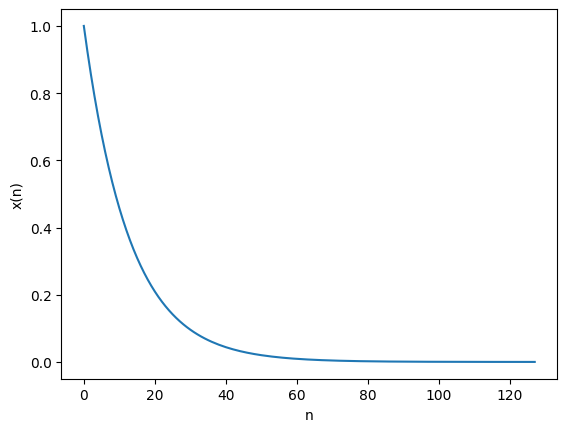

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# przygotuj przykladowy sygnal wejsciowy
N=128
x=np.exp(-10*np.arange(0,N)/N)
plt.plot(x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.show()

In [2]:
# obliczamy DFT
X=np.fft.fft(x)/N

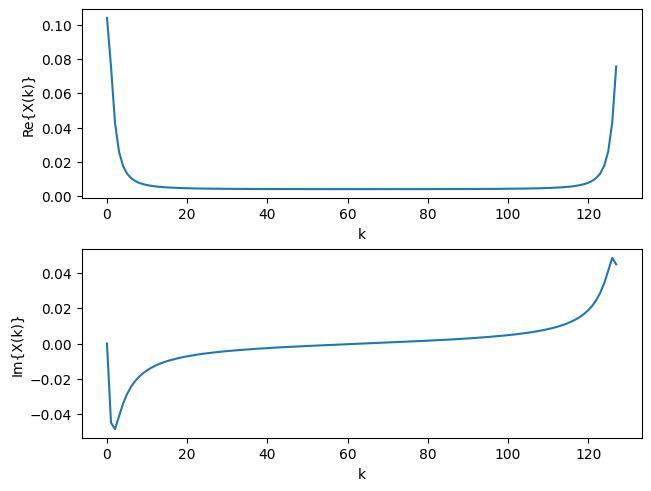

In [3]:
# prezentacja widma w postaci Re, Im
fig,axs=plt.subplots(2,layout='constrained')
axs[0].plot(np.real(X))
axs[0].set_xlabel('k')
axs[0].set_ylabel('Re{X(k)}')
axs[1].plot(np.imag(X))
axs[1].set_xlabel('k')
axs[1].set_ylabel('Im{X(k)}')
plt.show()

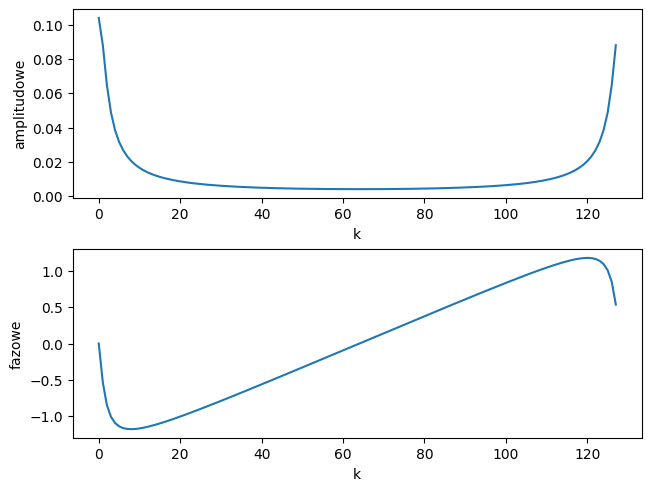

In [4]:
# prezentacja widma amplitudowego i fazowego
fig,axs=plt.subplots(2,layout='constrained')
axs[0].plot(np.abs(X))
axs[0].set_xlabel('k')
axs[0].set_ylabel('amplitudowe')
axs[1].plot(np.arctan2(np.imag(X),np.real(X)))
axs[1].set_xlabel('k')
axs[1].set_ylabel('fazowe')
plt.show()

Należy zawuażyć, że przekształcenie DFT dla sygnału wejściowego o wartościach rzeczywistych posiada własność symetrii:
    


$X(N-k)=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}x(n)e^{-i\frac{2\pi}{N}(N-k)n}=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}x(n)e^{-i\frac{2\pi}{N}Nn}e^{i\frac{2\pi}{N}kn}=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}x(n)e^{-i2\pi n}e^{i\frac{2\pi}{N}kn}=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}x(n)e^{i\frac{2\pi}{N}kn}$.

Oznacza to, że:
* $X(0)$ i $X(\frac{N}{2})$ są unikatowe,
* dla pozostałych wartości $k$, tj. $k=1,2,\dots,\frac{N}{2}-1$ zachodzi: $\mathrm{Re}\{X(k)\}=\mathrm{Re}\{X(N-k)\}$, a także $\mathrm{Im}\{X(k)\}=-\mathrm{Im}\{X(N-k)\}$.

W szczególnosci oznacza to, że $\|X(N-k)\|=\|X(k)\|$, $\mathrm{arg}\{X(N-k)\}=-\mathrm{arg}\{X(k)\}$ dla $k=1,2,\dots,\frac{N}{2}$. Tym samym prezentacja widma fazowego i amplitudowego jest zawężona najczęściej do zakresu $k=0,1,\dots,\frac{N}{2}$.

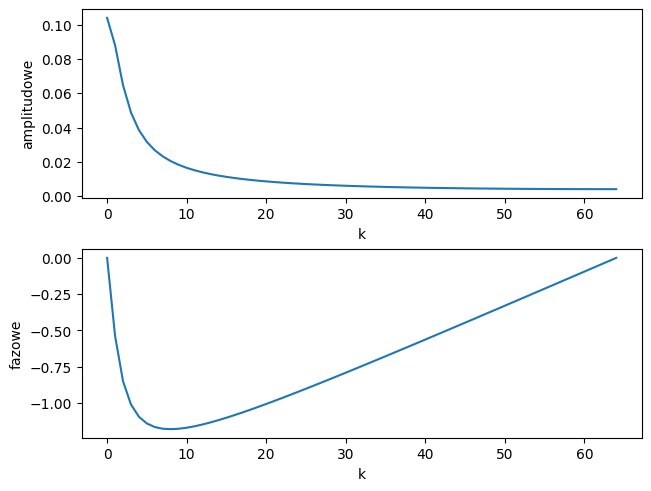

In [5]:
# prezentacja widma amplitudowego i fazowego z pominięciem symetrii
fig,axs=plt.subplots(2,layout='constrained')
axs[0].plot(np.abs(X)[0:N//2+1])
axs[0].set_xlabel('k')
axs[0].set_ylabel('amplitudowe')
axs[1].plot(np.arctan2(np.imag(X),np.real(X))[0:N//2+1])
axs[1].set_xlabel('k')
axs[1].set_ylabel('fazowe')
plt.xlabel('k')
plt.show()

### Dyskretne przekształcenie Fouriera dla sygnałów harmonicznych

W tym eksperymencie badamy postaci widm amplitudowego i fazowego dla sygnałów wejściowych będących przebiegami harmonicznymi o zadanych parametrach, takich jak liczba okresów $k$, amplituda $A$ i przesunięcie fazowe $f$. Mamy zatem:

$x(n)=A\cos(\frac{2\pi}{N}kn+f)$

dla $n=0,1,\dots,N-1$.

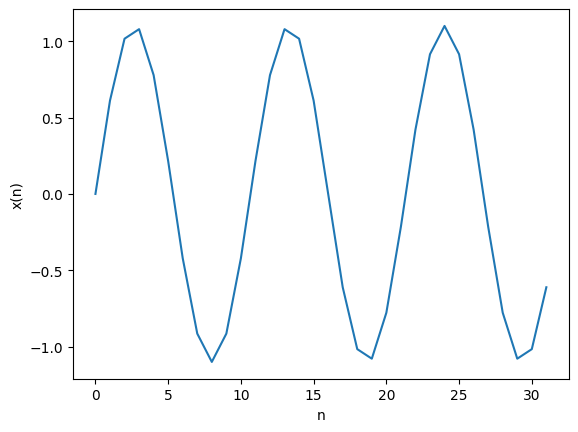

In [6]:
N=32
k=3
A=1.1
f=-0.5*np.pi
x=A*np.cos(2*np.pi/N*k*np.arange(0,N)+f)
plt.plot(x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.show()

In [7]:
# obliczamy DFT
X=np.fft.fft(x)/N
Xa=np.abs(X)[0:N//2+1]
T=np.round(10*np.copy(Xa))/10
T[T!=0]=1
Xa=2*Xa*T
Xf=(np.arctan2(np.imag(X),np.real(X))[0:N//2+1])*T
print('Xa:\n',np.round(Xa,2))
print('Xf:\n',np.round(Xf,2))

Xa:
 [0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Xf:
 [ 0.    0.    0.   -1.57 -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.
 -0.    0.   -0.    0.    0.  ]


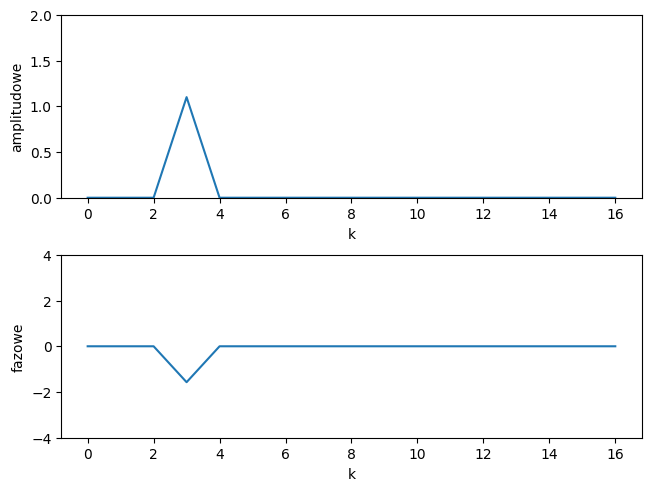

In [8]:
# prezentacja widma amplitudowego i fazowego z pominięciem symetrii
fig,axs=plt.subplots(2,layout='constrained')
axs[0].plot(Xa)
axs[0].set_xlabel('k')
axs[0].set_ylabel('amplitudowe')
axs[0].set_ylim(0,2)
axs[1].plot(Xf)
axs[1].set_xlabel('k')
axs[1].set_ylabel('fazowe')
axs[1].set_ylim(-4,4)
plt.xlabel('k')
plt.show()

**Wnioski.**

Widmo amplitudowe pozwala odczytać wartość amplitudy i częstotliwości (liczby okresów) składowej harmonicznej. Z kolei z widma fazowego możemy odczytać jej przesunięcie fazowe !!!


### Liniowość dyskretnego przekształcenia Fouriera

Przekształcenie Fouriera jest przekształceniem liniowym. Oznacza to, że widmo Fouriera dla kombinacji liniowej sygnałów będzie kombinacją liniową widm policzonych dla osobno dla sygnałów składowych. Niech $z(n)=ax(n)+b(y(n)$, gdzie $a$ i $b$ to skalary, wówczas własność tę możemy zapisać jako:

$Z(k)=aX(k)+bY(k)$.

Własność tę zostawiamy bez dowodu (dowód jest elementarny i wynika z definicji DFT). Poniższe przykłady prezentują liniowość przekształcenia DFT.

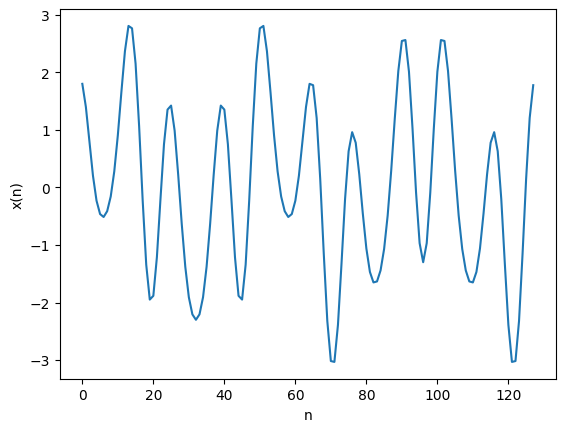

In [9]:
N=128
tk=[3,10,15]
tA=[1,1.8,0.5]
tf=[-0.5*np.pi,0*np.pi,0.5*np.pi]
x=np.zeros(N,float)
for i in range(0,len(tk)):
    x=x+tA[i]*np.cos(2*np.pi/N*tk[i]*np.arange(0,N)+tf[i])
plt.plot(x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.show()

In [10]:
# obliczamy DFT
X=np.fft.fft(x)/N
Xa=np.abs(X)[0:N//2+1]
T=np.round(10*np.copy(Xa))/10
T[T!=0]=1
Xa=2*Xa*T
Xf=(np.arctan2(np.imag(X),np.real(X))[0:N//2+1])*T
print('Xa:\n',np.round(Xa,2))
print('Xf:\n',np.round(Xf,2))

Xa:
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.8 0.  0.  0.  0.  0.5 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Xf:
 [ 0.    0.   -0.   -1.57 -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.
 -0.   -0.   -0.    1.57  0.    0.    0.    0.    0.    0.    0.    0.
  0.   -0.    0.   -0.    0.   -0.   -0.    0.   -0.    0.   -0.   -0.
 -0.   -0.    0.    0.   -0.   -0.   -0.   -0.    0.    0.    0.    0.
 -0.    0.    0.   -0.    0.   -0.   -0.   -0.    0.   -0.   -0.    0.
 -0.    0.    0.    0.    0.  ]


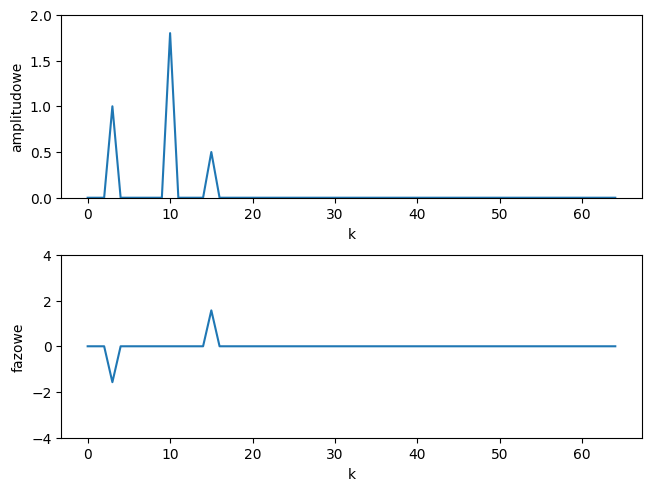

In [11]:
# prezentacja widma amplitudowego i fazowego z pominięciem symetrii
fig,axs=plt.subplots(2,layout='constrained')
axs[0].plot(Xa)
axs[0].set_xlabel('k')
axs[0].set_ylabel('amplitudowe')
axs[0].set_ylim(0,2)
axs[1].plot(Xf)
axs[1].set_xlabel('k')
axs[1].set_ylabel('fazowe')
axs[1].set_ylim(-4,4)
plt.xlabel('k')
plt.show()

### Dyskretne przekształcenie Fouriera dla wybranych sygnałów

Poniżej prezentujemy widma przykładowych sygnałów, których implementacje są w programach laboratoryjnych. Typowo widmo amplitudowe dla sygnałów zanika wraz ze wzrostem $k$. Szybkość spadku jest zależna od różniczkowalności sygnału. Im sygnał bardziej "gładki", tym widmo zanika szybciej.

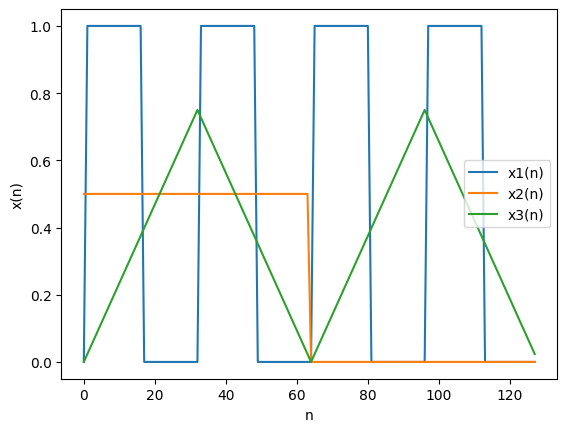

In [12]:
t=np.arange(0,N)/N
x1=np.ceil((0.9*np.sin(2*np.pi*t*4)))
x2=np.zeros(N,float)
x2[0:N//2]=0.5
x3=np.zeros(N,float)
N4=N//4
x3=0.75*np.concatenate((np.arange(0,N4)/N4,1-np.arange(0,N4)/N4,np.arange(0,N4)/N4,1-np.arange(0,N4)/N4))
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.legend(['x1(n)','x2(n)','x3(n)'])
plt.show()

In [13]:
def cDFT(x):
    
    n=len(x)
    X=np.fft.fft(x)/n
    Xa=np.abs(X)[0:n//2+1]
    T=np.round(10000*np.copy(Xa))/10000
    T[T!=0]=1
    Xa=2*Xa*T
    Xf=(np.arctan2(np.imag(X),np.real(X))[0:n//2+1])*T
    return Xa,Xf

def sDFT(Xa,Xf):
    
    # prezentacja widma amplitudowego i fazowego z pominięciem symetrii
    fig,axs=plt.subplots(2,layout='constrained')
    axs[0].plot(Xa)
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('amplitudowe')
    axs[0].set_ylim(0,1.1*np.max(Xa))
    axs[1].plot(Xf)
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('fazowe')
    axs[1].set_ylim(-4,4)
    plt.xlabel('k')
    plt.show()

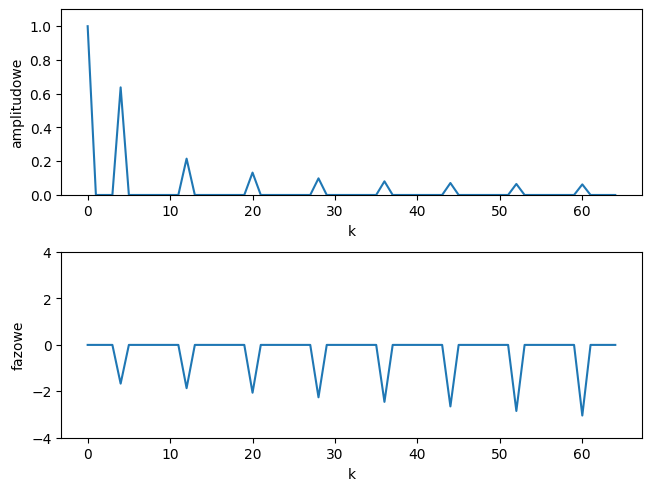

X1a:
 [1.         0.         0.         0.         0.63764358 0.
 0.         0.         0.         0.         0.         0.
 0.21530589 0.         0.         0.         0.         0.
 0.         0.         0.13258471 0.         0.         0.
 0.         0.         0.         0.         0.09851933 0.
 0.         0.         0.         0.         0.         0.
 0.08085272 0.         0.         0.         0.         0.
 0.         0.         0.070868   0.         0.         0.
 0.         0.         0.         0.         0.06531233 0.
 0.         0.         0.         0.         0.         0.
 0.06280241 0.         0.         0.         0.        ]
X1f:
 [ 0.          0.          0.          0.         -1.6689711   0.
  0.          0.          0.          0.          0.          0.
 -1.86532064  0.          0.          0.          0.          0.
  0.          0.         -2.06167018  0.          0.          0.
  0.          0.          0.          0.         -2.25801972  0.
  0.          0.

In [14]:
X1a,X1f=cDFT(x1)
sDFT(X1a,X1f)
print('X1a:\n',X1a)
print('X1f:\n',X1f)

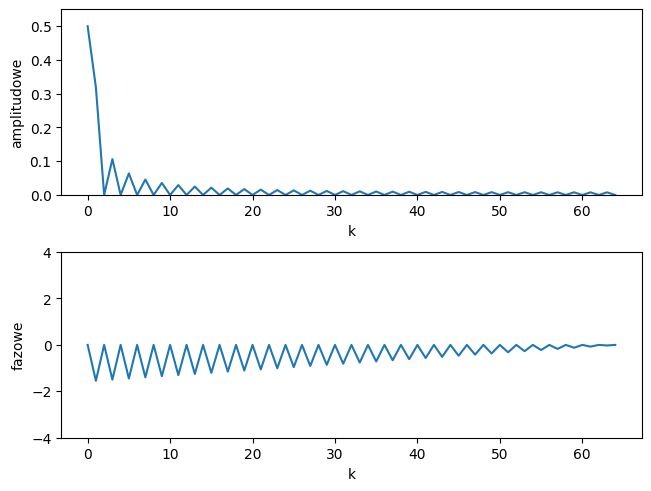

X2a:
 [0.5        0.31834185 0.         0.10619923 0.         0.06382205
 0.         0.04569732 0.         0.03565703 0.         0.02929181
 0.         0.02490582 0.         0.02170772 0.         0.01927864
 0.         0.01737612 0.         0.01585013 0.         0.01460287
 0.         0.01356789 0.         0.01269847 0.         0.01196085
 0.         0.01133001 0.         0.01078706 0.         0.0103175
 0.         0.00990998 0.         0.00955558 0.         0.00924716
 0.         0.00897899 0.         0.0087464  0.         0.00854563
 0.         0.00837359 0.         0.00822777 0.         0.00810614
 0.         0.00800705 0.         0.00792924 0.         0.0078717
 0.         0.00783373 0.         0.00781485 0.        ]
X2f:
 [ 0.         -1.54625263  0.         -1.49716525  0.         -1.44807786
  0.         -1.39899048  0.         -1.34990309  0.         -1.30081571
  0.         -1.25172832  0.         -1.20264094  0.         -1.15355355
  0.         -1.10446617  0.         -1.0553

In [15]:
X2a,X2f=cDFT(x2)
sDFT(X2a,X2f)
print('X2a:\n',X2a)
print('X2f:\n',X2f)

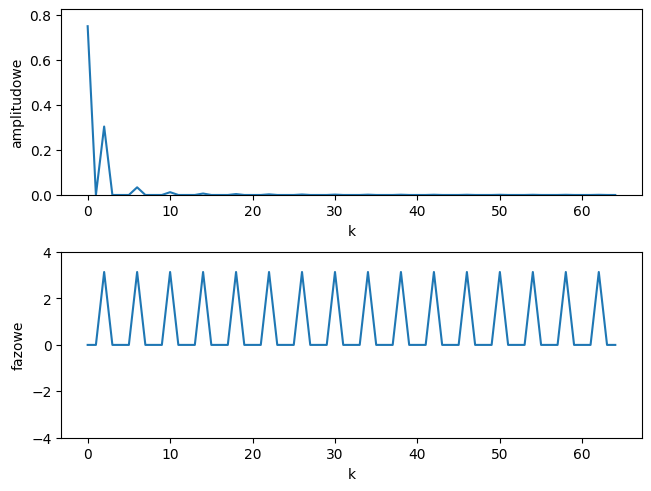

X3a:
 [7.50000000e-01 0.00000000e+00 3.04207809e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.40189311e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24056524e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.45335334e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.00661062e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.77115911e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.06398778e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.62402615e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.33408095e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13528726e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.95546417e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.96261484e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.26190137e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.78376746e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.48537767e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.34189537e-04 0.00000000e+00
 0.00000000e+00]
X

In [16]:
X3a,X3f=cDFT(x3)
sDFT(X3a,X3f)
print('X3a:\n',X3a)
print('X3f:\n',X3f)

### Złożoność obliczeniowa DFT

Przekształcenie DFT, chociaż z definicji zapisujemy w postaci sumy ważonej szeregów, to poprzez liniowość może być zapisane w postaci algebraicznej, jako mnożenie macierzy o wymiarze $N$ na $N$ elementów przez wektor kolumnowy oi liczbie $N$ elementów. Z teorii algorytmów wiadomo, że złożoność takiego mnożenia jest rzędu $\mathcal{O}(N^2)$. Oczywiście należy wziąć pod uwagę fakt, że zarówno mnożenia, jak i dodawania w ramach definicji DFT operują na liczbach zespolonych, to w sensie rzędu operacji arytmetycznych nie powoduje to żadnej zmiany. Czy taka złożoność jest duża? Rozważmy przykładową elementarną implementację.

In [18]:
import time
import math

def dft(x):
    
    n=len(x)
    X=np.zeros(n,complex)
    for k in range(0,N):
        for n in range(0,N):
            X[k]+=x[n]*(math.cos(2*math.pi/N*k*n)-1j*math.sin(2*math.pi/N*k*n))
    return X

N=10
x=np.random.normal(0,1,N)
tic=time.process_time()
X=dft(x)
toc=time.process_time()
print("Czas obliczeń: "+str(1000*(toc-tic))+" ms")

Czas obliczeń: 0.0 ms


Czy istnieje możliwość redukcji złożoności obliczeniowej DFT? Na to pytanie udzielimy odpowiedzi w ramach kolejnego wykładu.

---